## Loading packages and data

In [1]:
import numpy as np
import pandas as pd
import os
import re
!pip install missingno
import missingno as msno
from google.colab import files
!pip install xlrd
import xlrd
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/07/e6/e95c4eec6221bfd8528bcc4ea252a850bffcc4be88ebc367e23a1a84b0bb/xlrd-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/7c/84f15ee705793a3cdd43bc65e6166d65d36f743b815ea517b02582989533/pandas_profiling-1.4.1-py2.py3-none-any.whl


/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error

In [0]:
data = files.urllib.request.urlretrieve('https://www.openml.org/data/get_csv/57/dataset_57_hypothyroid.arff', filename=None)[0]
df = pd.read_csv(data)

## EDA

In [3]:
df.head().T

,0,1,2,3,4
age,41,23,46,70,70
sex,F,F,M,F,F
on_thyroxine,f,f,f,t,f
query_on_thyroxine,f,f,f,f,f
on_antithyroid_medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid_surgery,f,f,f,f,f
I131_treatment,f,f,f,f,f
query_hypothyroid,f,f,f,f,f


In [0]:
df.replace('?', np.nan, inplace=True)

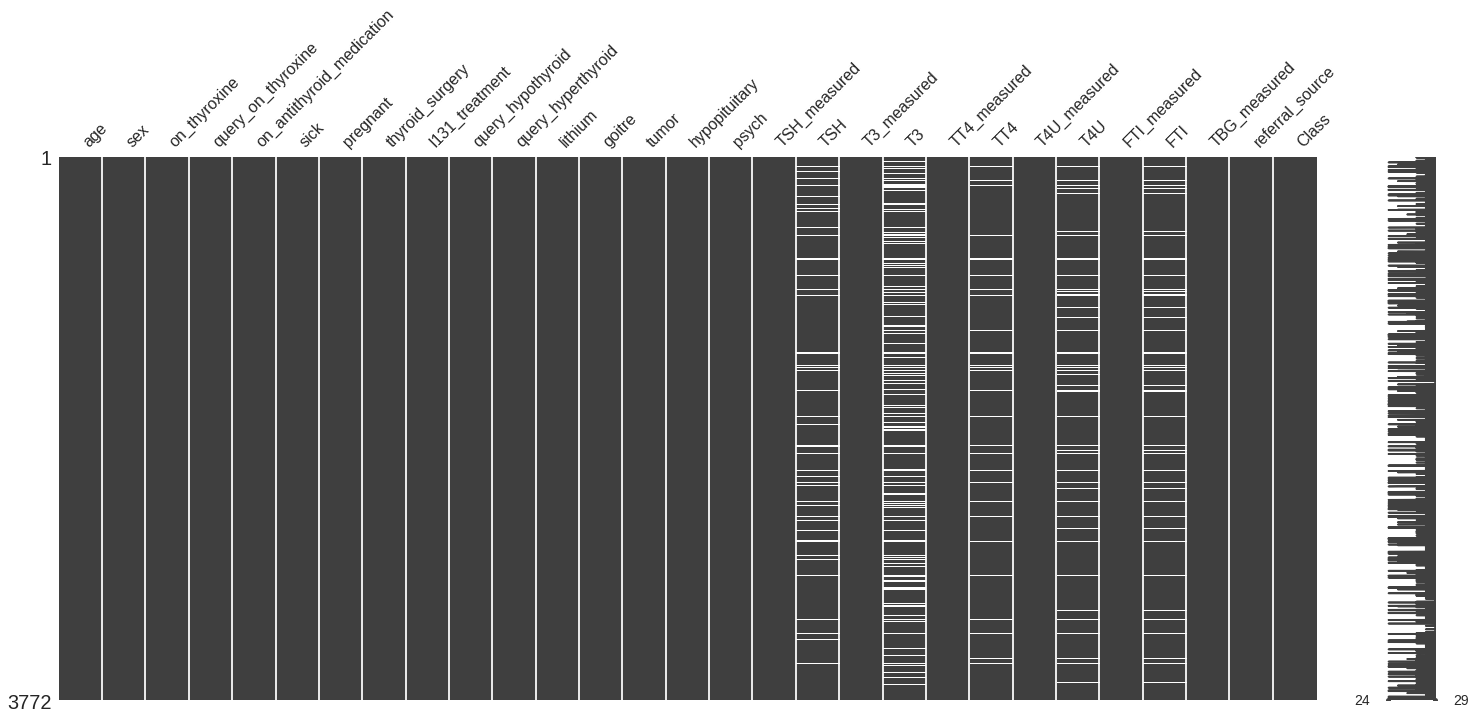

In [52]:
msno.matrix(df)
plt.show()

In [6]:
df.drop(columns='TBG', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
age                          3771 non-null object
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3403 non-null 

In [0]:
for i in df:
  try:
    df[i] = df[i].astype(float)
  except:
    continue

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
age                          3771 non-null float64
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3403 non-null

In [9]:
sum(df.pregnant[df.sex==np.nan] == 't')

0

In [10]:
df.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.059087,-0.238412,-0.038841,-0.166250,0.052788
TSH,-0.059087,1.000000,-0.161823,-0.267365,0.073391,-0.304684
T3,-0.238412,-0.161823,1.000000,0.559503,0.454127,0.348921
TT4,-0.038841,-0.267365,0.559503,1.000000,0.434572,0.793312
T4U,-0.166250,0.073391,0.454127,0.434572,1.000000,-0.174012
FTI,0.052788,-0.304684,0.348921,0.793312,-0.174012,1.000000


In [11]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [12]:
df.age[df.age > 100]

1364    455.0
Name: age, dtype: float64

In [13]:
df.age[1364] = df.age.median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


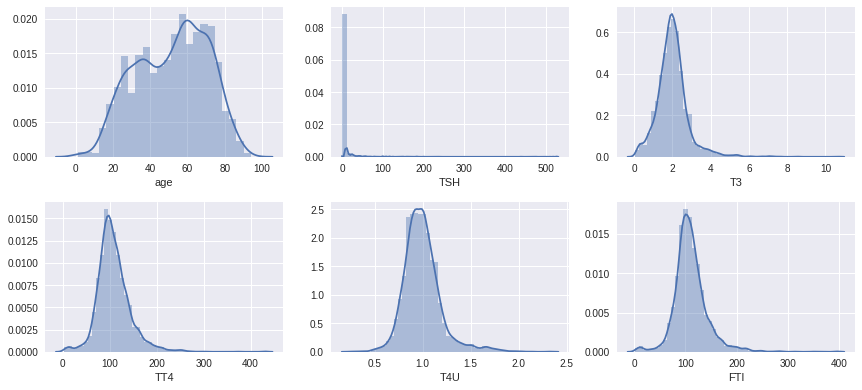

In [14]:
index = 0
for column in df:
  if df[column].dtype == 'float64':
    index += 1
    plt.subplot(3, 3, index)
    sns.distplot(df[column].dropna())
    #sns.distplot(np.log(df[column].dropna()))
plt.subplots_adjust(top=2, right=2, hspace=0.3)

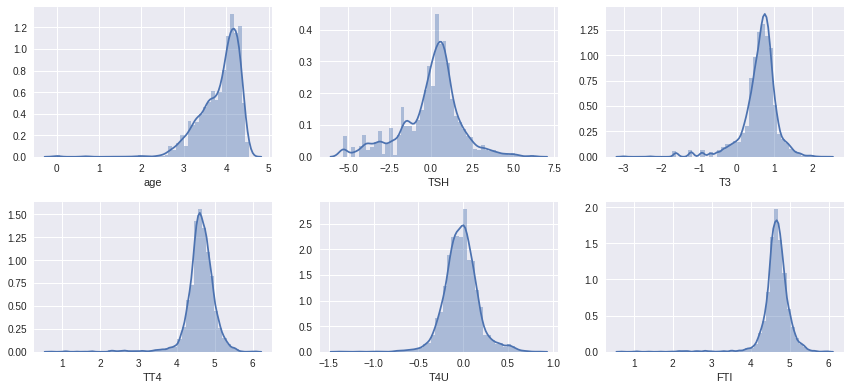

In [15]:
index = 0
for column in df:
  if df[column].dtype == 'float64':
    index += 1
    plt.subplot(3, 3, index)
    #sns.distplot(df[column].dropna())
    sns.distplot(np.log(df[column].dropna()))
plt.subplots_adjust(top=2, right=2, hspace=0.3)

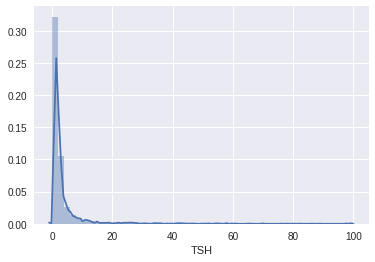

In [16]:
sns.distplot(df.TSH[df.TSH < 100])

In [17]:
len(df.TSH[df.TSH > 100])

29

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


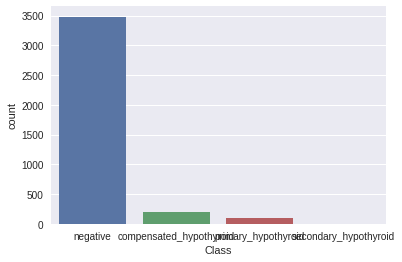

In [18]:
sns.countplot(df.Class)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


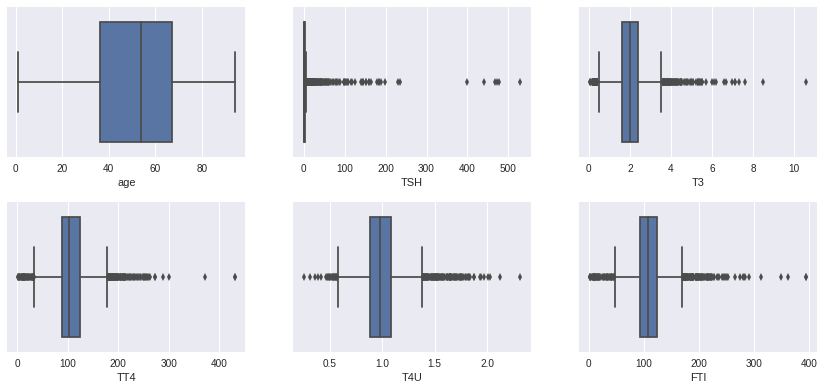

In [19]:
index = 0
for column in df:
  if df[column].dtype == 'float64':
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(df[column].dropna())
    #sns.distplot(np.log(df[column].dropna()))
plt.subplots_adjust(top=2, right=2, hspace=0.3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


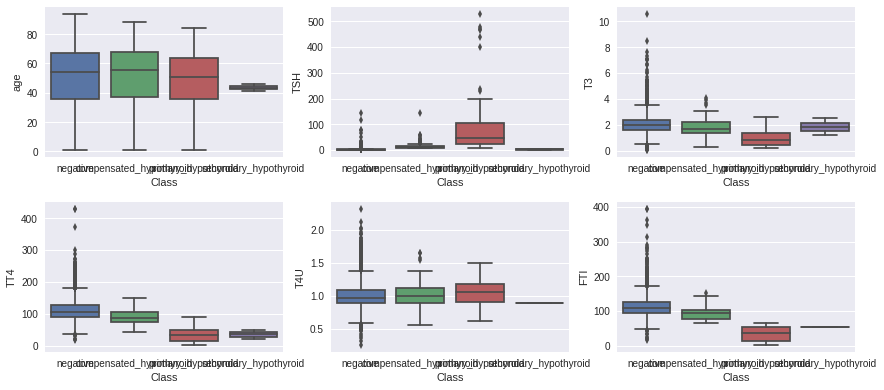

In [20]:
index = 0
for column in df.columns:
  if (df[column].dtype == 'float64' and sum(df[column].isnull())):
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(x=df.Class, y=df[column].dropna())
    #sns.distplot(np.log(df[column].dropna()))
plt.subplots_adjust(top=2, right=2, hspace=0.3)

In [21]:
df.Class.unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [0]:
df.sex.fillna(df.sex.mode().iloc[0], inplace=True)

In [0]:
for column in df:
  if sum(df[column].isnull()):#fill nans with respect to the median in each class
    df[column].fillna(df[column].median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


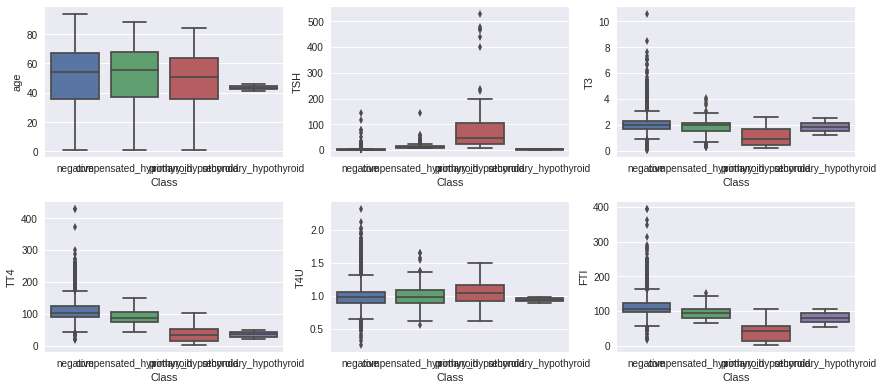

In [64]:
index = 0
for column in df.columns:
  if (df[column].dtype == 'float64'):
    index += 1
    plt.subplot(3, 3, index)
    sns.boxplot(x=df.Class, y=df[column].dropna())
    #sns.distplot(np.log(df[column].dropna()))
plt.subplots_adjust(top=2, right=2, hspace=0.3)

In [0]:
column = 'TSH'
for label in df.Class.unique():
      df[column][df.Class == label][df[column].isnull() == True] = 2

In [58]:
df['T3'][df.Class == label].values = 2

AttributeError: ignored